In [1]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

In [2]:
#pip install tensorflow_datasets

In [3]:
#!pip install --upgrade tensorflow-datasets

In [4]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
tfds.disable_progress_bar()

In [5]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
train_dataset.element_spec

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [6]:
#pip install kaggle

In [7]:
#kaggle kernels output "tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model" -p F:/Sentiment


In [8]:
#for example,label in train_dataset.take(1):
   # print(label.numpy())
    #print(label.numpy())
    

In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [10]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [11]:
for example, label in train_dataset.take(1):
    print('texts: ', example.numpy()[:3])
    print()
    print('labels: ', label.numpy()[:3])

texts:  [b"The premise for this movie is simple and so is the script: an elderly Muslim gets his teenage son to drive him in his similarly elderly station wagon from France to the haj in Mecca, Saudi Arabia, so that he can fulfill his holy Muslim obligation before he dies. The father is clearly devoutly religious, but the son is unimpressed; he accepts out of obligation to his father rather than to religion, he'd rather be with his (non-Muslim) girlfriend. The father is stubborn in a lot of things which the son doesn't understand and the petulance between them is the device that maintains the drama, although it is often rather irksome. However, like any good road movie there are oddball characters encountered along the way; for example a woman on a backroad in Croatia who upon being asked for directions to Belgrade simply gets in the backseat and points with her hand uttering one word which they assume to be a place but can't find it on the map. In Bulgaria another man they ask directi

In [12]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [13]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [14]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  2, 839,  16, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0],
       [ 13,  13, 143, ...,   0,   0,   0]])

In [15]:
for n in range(3):
    print("Original: ", example[n].numpy())
    print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
    print()

Original:  b"The premise for this movie is simple and so is the script: an elderly Muslim gets his teenage son to drive him in his similarly elderly station wagon from France to the haj in Mecca, Saudi Arabia, so that he can fulfill his holy Muslim obligation before he dies. The father is clearly devoutly religious, but the son is unimpressed; he accepts out of obligation to his father rather than to religion, he'd rather be with his (non-Muslim) girlfriend. The father is stubborn in a lot of things which the son doesn't understand and the petulance between them is the device that maintains the drama, although it is often rather irksome. However, like any good road movie there are oddball characters encountered along the way; for example a woman on a backroad in Croatia who upon being asked for directions to Belgrade simply gets in the backseat and points with her hand uttering one word which they assume to be a place but can't find it on the map. In Bulgaria another man they ask direc

In [16]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [17]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True, True, True]


In [18]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 9s 9s/step
[0.00468022]


In [19]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

1/1 [==============================] - 0s 114ms/step
[0.00468023]


In [20]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [21]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)


Epoch 1/10
391/391 [==============================] - 84s 167ms/step - loss: 0.6177 - accuracy: 0.6019 - val_loss: 0.4229 - val_accuracy: 0.8042
Epoch 2/10
391/391 [==============================] - 47s 119ms/step - loss: 0.3762 - accuracy: 0.8358 - val_loss: 0.3491 - val_accuracy: 0.8536
Epoch 3/10
391/391 [==============================] - 49s 125ms/step - loss: 0.3361 - accuracy: 0.8572 - val_loss: 0.3450 - val_accuracy: 0.8401
Epoch 4/10
391/391 [==============================] - 46s 117ms/step - loss: 0.3202 - accuracy: 0.8654 - val_loss: 0.3334 - val_accuracy: 0.8651
Epoch 5/10
391/391 [==============================] - 47s 120ms/step - loss: 0.3107 - accuracy: 0.8683 - val_loss: 0.3191 - val_accuracy: 0.8641
Epoch 6/10
391/391 [==============================] - 47s 118ms/step - loss: 0.3072 - accuracy: 0.8711 - val_loss: 0.3188 - val_accuracy: 0.8604
Epoch 7/10
391/391 [==============================] - 46s 117ms/step - loss: 0.3035 - accuracy: 0.8704 - val_loss: 0.3193 - val_ac

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
model.save('my_model') 

In [24]:
new_model = tf.keras.models.load_model('my_model')



In [25]:
new_model = tf.keras.models.load_model('my_model')
test_loss, test_acc = new_model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
# Check its architecture
new_model.summary()

391/391 [==============================] - 29s 54ms/step - loss: 0.3156 - accuracy: 0.8558
Test Loss: 0.3155818283557892
Test Accuracy: 0.8557999730110168
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                 

In [26]:
# predict on a sample text without padding.

sample_text = ('The wedding hall was very bad and the organizers were not professional.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

sample_text = ('The wedding hall was good but the overall event was exciting.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

if(predictions>(-0.4)):
  print("Good Review")

if(predictions<(-0.4)):
  print("Bad Review")


1/1 [==============================] - 5s 5s/step
[[-1.0915141]]
1/1 [==============================] - 0s 24ms/step
[[0.37690428]]
Good Review


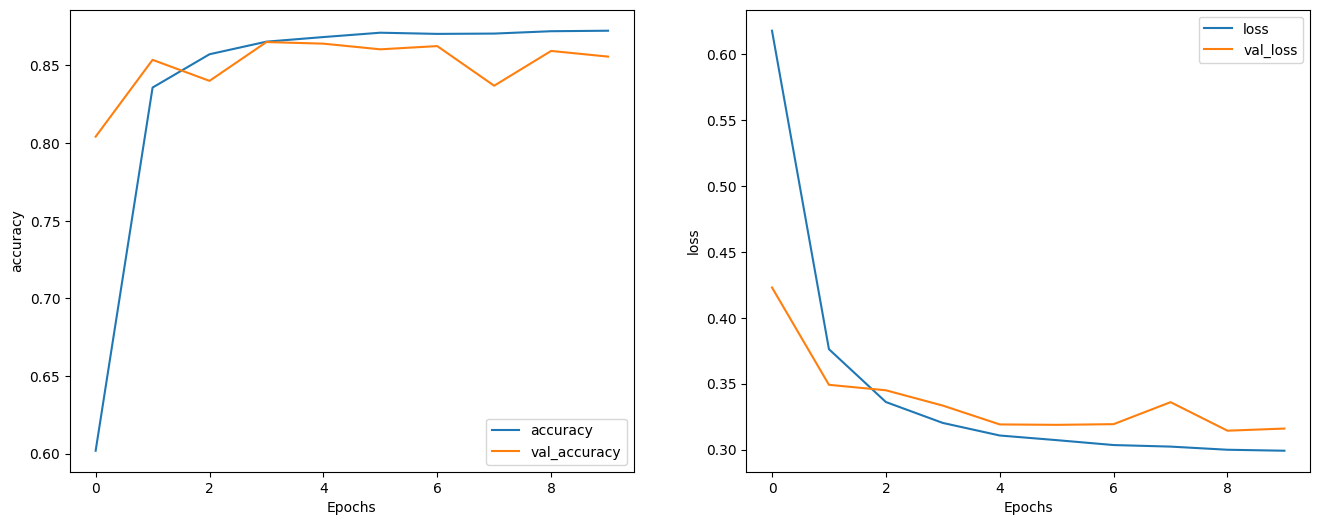

In [27]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')